<a href="https://colab.research.google.com/github/chaiwencw/Higher-Education-Students-Performance-Evaluation/blob/main/EDA_(Asgn1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import necessaries libraries 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# 1.0 Data Preprocessing

---



Performing data preprocessing before exploratory data analysis (EDA). This section include loading data, exploring the number of rows & columns, handling missing value or invalid data.

In [ ]:
#import dataset and set STUDENT_ID as index
url = 'https://raw.githubusercontent.com/chaiwencw/EDA-Higher-Education-Students-Performance-Evaluation/main/student_prediction_edited.csv'
stud_df = pd.read_csv(url,index_col = 'STUDENTID')

In [ ]:
#view first few rows of the dataset
stud_df.head()

,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,LIVING,MOTHER_EDU,FATHER_EDU,#_SIBLINGS,KIDS,MOTHER_JOB,FATHER_JOB,STUDY_HRS,CUML_GPA,EXP_GPA
STUDENTID,,,,,,,,,,,,,,,,,,,
STUDENT1,23,2,3,3,1,2,2,170,1,1,1,2,3,1,2,5,7.0,1,1
STUDENT2,23,2,3,3,1,2,2,185,1,1,2,3,2,1,2,1,4.0,2,3
STUDENT3,24,2,2,3,2,2,2,255,4,2,2,2,2,1,2,1,2.0,2,2
STUDENT4,20,1,1,3,1,2,1,215,1,2,1,2,5,1,2,1,6.0,3,2
STUDENT5,23,2,1,3,2,2,1,320,1,4,3,3,2,1,2,4,3.0,2,2


The categorical columns are already encoded with numeric values. So, we decode them for readability.

In [ ]:
# rename columns
stud_df.rename(columns ={'LIVING':'ACCOMM_TYPE','KIDS':'PARENTAL_STATUS'}, inplace = True)

# create attribute dictionary
attr_dict = { 
    'GENDER': {
        1: 'Female',
        2: 'Male'
      },
    'HS_TYPE': {
        1: 'Private',
        2: 'State',
        3: 'Other'
    },
    'SCHOLARSHIP': {
        1: '0%',
        2: '25%',
        3: '50%',
        4: '75%',
        5: '100%'
    }, 
    'WORK': {1: 'Yes', 2: 'No'},
    'ACTIVITY': {1: 'Yes', 2: 'No'},
    'PARTNER': {1: 'Yes', 2: 'No'},
    'TRANSPORT': {
        1: 'Bus',
        2: 'Private Car/Taxi',
        3: 'Bicycle',
        4: 'Other'
    }, 
    'ACCOMM_TYPE': {
        1: 'Rental',
        2: 'Dormitory',
        3: 'With family',
        4: 'Other'
    },
    'MOTHER_EDU': {
        1: 'Primary school',
        2: 'Secondary school',
        3: 'High school',
        4: 'University',
        5: 'MSc.',
        6: 'Ph.D.'
    },
    'FATHER_EDU': {
        1: 'Primary school',
        2: 'Secondary school',
        3: 'High school',
        4: 'University',
        5: 'MSc.',
        6: 'Ph.D.'
    }, 
    '#_SIBLINGS':{
        1:'1',
        2:'2',
        3:'3',
        4:'4',
        5: '5 or above'
    },
    'PARENTAL_STATUS': {
        1: 'Married',
        2: 'Divorced',
        3: 'Died - one of them or both'
    },
    'MOTHER_JOB': {
        1: 'Retired',
        2: 'Housewife',
        3: 'Government officer',
        4: 'Private sector employee',
        5: 'Self-employment',
        6: 'Other'
    },
    'FATHER_JOB': {
        1: 'Retired',
        2: 'Government officer',
        3: 'Private sector employee',
        4: 'Self-employment',
        5: 'Other'
    },
    'CUML_GPA': {
        1: '<2.00',
        2: '2.00-2.49',
        3: '2.50-2.99',
        4: '3.00-3.49',
        5: 'Above 3.49'
    },
    'EXP_GPA': {
        1: '<2.00',
        2: '2.00-2.49',
        3: '2.50-2.99',
        4: '3.00-3.49',
        5: 'Above 3.49'
    }
}
# map attribute dictionary to the categorical columns (decode numeric values to string)
for col in stud_df.columns:
  if col in attr_dict:
    stud_df[col] = stud_df[col].map(attr_dict[col].get)
stud_df.head()

,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,ACCOMM_TYPE,MOTHER_EDU,FATHER_EDU,#_SIBLINGS,PARENTAL_STATUS,MOTHER_JOB,FATHER_JOB,STUDY_HRS,CUML_GPA,EXP_GPA
STUDENTID,,,,,,,,,,,,,,,,,,,
STUDENT1,23,Male,Other,50%,Yes,No,No,170,Private Car/Taxi,Rental,Primary school,Secondary school,3,Married,Housewife,Other,7.0,<2.00,<2.00
STUDENT2,23,Male,Other,50%,Yes,No,No,185,Private Car/Taxi,Rental,Secondary school,High school,2,Married,Housewife,Retired,4.0,2.00-2.49,2.50-2.99
STUDENT3,24,Male,State,50%,No,No,No,255,Other,Dormitory,Secondary school,Secondary school,2,Married,Housewife,Retired,2.0,2.00-2.49,2.00-2.49
STUDENT4,20,Female,Private,50%,Yes,No,Yes,215,Private Car/Taxi,Dormitory,Primary school,Secondary school,5 or above,Married,Housewife,Retired,6.0,2.50-2.99,2.00-2.49
STUDENT5,23,Male,Private,50%,No,No,Yes,320,Private Car/Taxi,Other,High school,High school,2,Married,Housewife,Self-employment,3.0,2.00-2.49,2.00-2.49


In [ ]:
# Check for Index Duplicates 

# Approach 1
stud_df[stud_df.index.duplicated(keep = False)].sort_index()

# Approach 2 
# idx_duplicate = stud_df.index.duplicated(keep = False)
# if idx_duplicate.any():
#   print( stud_df.loc[idx_duplicate].sort_index(), end ='\n')
# else:
#   print("No duplicates present.")

,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,ACCOMM_TYPE,MOTHER_EDU,FATHER_EDU,#_SIBLINGS,PARENTAL_STATUS,MOTHER_JOB,FATHER_JOB,STUDY_HRS,CUML_GPA,EXP_GPA
STUDENTID,,,,,,,,,,,,,,,,,,,



There are no duplicates found.

In [ ]:
# Determine number of rows and columns
stud_df.shape

(145, 19)

> *`df.shape` returns a tuple (nrow,ncolumn)
, representing the dimensionality of the dataframe.*



The number of rows and columns of the dataset are 145 and 19, respectively.



In [ ]:
# Quick view basic information of data frame 
stud_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, STUDENT1 to STUDENT145
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AGE              145 non-null    int64  
 1   GENDER           145 non-null    object 
 2   HS_TYPE          145 non-null    object 
 3   SCHOLARSHIP      145 non-null    object 
 4   WORK             145 non-null    object 
 5   ACTIVITY         145 non-null    object 
 6   PARTNER          145 non-null    object 
 7   SALARY           145 non-null    int64  
 8   TRANSPORT        120 non-null    object 
 9   ACCOMM_TYPE      145 non-null    object 
 10  MOTHER_EDU       145 non-null    object 
 11  FATHER_EDU       145 non-null    object 
 12  #_SIBLINGS       145 non-null    object 
 13  PARENTAL_STATUS  145 non-null    object 
 14  MOTHER_JOB       145 non-null    object 
 15  FATHER_JOB       145 non-null    object 
 16  STUDY_HRS        116 non-null    float64
 17  CUML_GP


> *df.info()* returns the basic information of the data frame, including the total number of entries, the count of missing values and the data type of each column.

In [ ]:
# Identify the count of unique values in each column
stud_df.nunique()

AGE                 8
GENDER              2
HS_TYPE             3
SCHOLARSHIP         5
WORK                2
ACTIVITY            2
PARTNER             2
SALARY             40
TRANSPORT           3
ACCOMM_TYPE         4
MOTHER_EDU          6
FATHER_EDU          6
#_SIBLINGS          5
PARENTAL_STATUS     3
MOTHER_JOB          5
FATHER_JOB          5
STUDY_HRS          17
CUML_GPA            5
EXP_GPA             4
dtype: int64

**Handling with Missing Values**

In [ ]:
#Check the total null values in each column
stud_df.isnull().sum()

AGE                 0
GENDER              0
HS_TYPE             0
SCHOLARSHIP         0
WORK                0
ACTIVITY            0
PARTNER             0
SALARY              0
TRANSPORT          25
ACCOMM_TYPE         0
MOTHER_EDU          0
FATHER_EDU          0
#_SIBLINGS          0
PARENTAL_STATUS     0
MOTHER_JOB          0
FATHER_JOB          0
STUDY_HRS          29
CUML_GPA            0
EXP_GPA             0
dtype: int64


> *`df.isnull()`* is used to detect missing values. It returns the data frame where the NULL values are replaced with True, otherwise False.

> *`df.isnull().sum()`* returns the count of missing values in the each column


The only column with missing values is STUDY_HRS, in a total of 29.






In [ ]:
print(f'Percentage of missing values in STUDY_HRS: {29/len(stud_df)*100}%.')

Percentage of missing values in STUDY_HRS: 20.0%.


Since 20% of missing values is still acceptable, mean or median imputation is applicable instead of removing the data. Since the mean value will be highly influenced by outliers, we use median to replace the missing values in STUDY_HRS.


In [ ]:
stud_df.fillna({'STUDY_HRS': stud_df.STUDY_HRS.median()}, inplace = True)
print(f'Number of missing values in STUDY_HRS after median imputation: {stud_df.STUDY_HRS.isnull().sum()}.')

Number of missing values in STUDY_HRS after median imputation: 0.


# 2.0 Exploratory Data Analysis

---








### 2.1 Numerical Data Analysis



In [ ]:
#Determine basic descriptive statistic (.T : transpose)
stud_df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,145.0,22.110345,1.911650,19.0,21.0,23.0,23.0,26.0
SALARY,145.0,213.931034,74.092159,135.0,165.0,185.0,250.0,520.0
STUDY_HRS,145.0,5.262069,4.085919,1.0,3.0,4.0,6.0,22.0


> *`df.describe()`* returns the basic descriptive statistics of numerical data in the data frame, including count, mean, standard deviation, min, max, and percentiles.

Apart from using the quick descriptive analysis, we can perform a more detailed and specific descriptive analysis as shown below:




In [ ]:
#Find mean of numerical variables & round the floating-point num in 2 decimal places
round(stud_df.mean(numeric_only=True),2)

AGE           22.11
SALARY       213.93
STUDY_HRS      5.26
dtype: float64

*   The average age of the higher education students is about 22 years old.
*  The average total salary earned by the students (if available) is 213.93 dollars.
*  Students spent an average of 5.26 hours in study per week.

In [ ]:
#Find median of numerical variables
stud_df.median(numeric_only=True)

AGE           23.0
SALARY       185.0
STUDY_HRS      4.0
dtype: float64

*  The median of AGE is 23 years old.
*  The median of SALARY is 185 dollars.
*  The median of STUDY_HRS is 4 hours.
*  The median of SALARY and STUDY_HRS are smaller than their mean values.




In [ ]:
#Determine the skewness of data
stud_df.skew(numeric_only=True)

AGE          0.148779
SALARY       1.702174
STUDY_HRS    2.286651
dtype: float64

* All skewness values are positive, implying their distribution is positively-skewed (right-skewed).
* The skewness value of AGE is very low, which means the data is fairly symmetrical.
* STUDY_HRS skewed to the right the most, which implies mean > median, as expected.

In [ ]:
#Determine kurtosis
stud_df.kurtosis(numeric_only=True)

AGE         -0.654111
SALARY       2.990052
STUDY_HRS    6.044287
dtype: float64

* Only AGE has negative kurtosis value, indicating a flat and thin-tailed distribution. So, outliers are less likely to occur.
* SALARY and STUDY_HRS have positive kurtosis, which means their distribution is peaked and has thick tails. So, outliers are expected and more likely to occur.
* Since the kurtosis value of STUDY_HRS is higher than SALARY, it is more heavy-tailed, where more data values located in the tails instead of around the mean.





**Numerical Data Distribution Visualization**

1. Boxplot

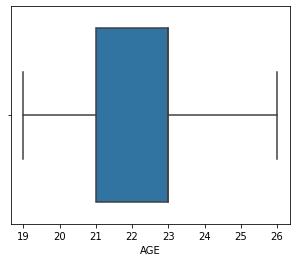

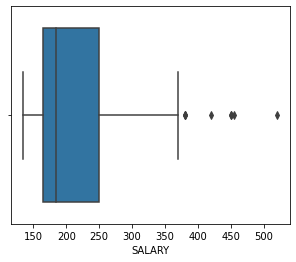

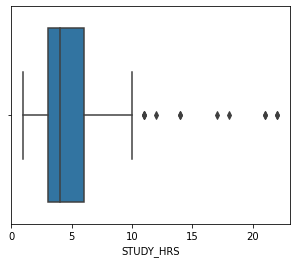

In [ ]:
#num_df consists of all numerical columns only
num_df = stud_df.select_dtypes(exclude = "object")

#Plot a boxplot for each numerical column 
for col in num_df:
  plt.figure(figsize=(5,4))
  sns.boxplot(x = num_df[col])
  plt.show()
  print('\n')
  

2. Histogram and Density Plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


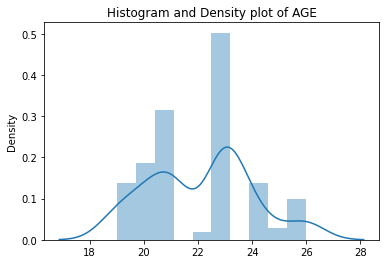

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


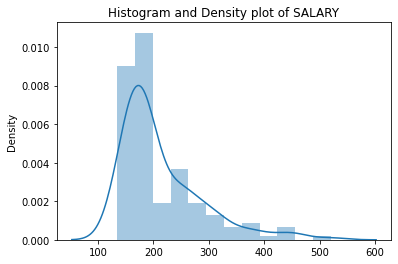

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


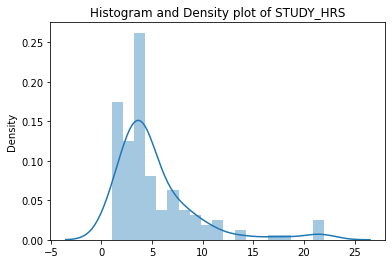

In [ ]:
#Plot a histogram and density plot for each numerical column 
for col in num_df:
  fig = sns.distplot(x = num_df[col])
  fig.set(title=f'Histogram and Density plot of {col}')
  plt.show()

The distributions of each box plot and histogram and density plot of each variables are as expected in our skewness and kurtosis intepretation above.

**Correlation between Numerical Data**

In [ ]:
# find correlation matrix
stud_df.corr()

,AGE,SALARY,STUDY_HRS
AGE,1.000000,0.081737,-0.070409
SALARY,0.081737,1.000000,-0.048272
STUDY_HRS,-0.070409,-0.048272,1.000000


*  From the correlation matrix, we can conclude that none of them (age,
gender and weekly study hours) is strongly correlated. It indicates that the relationship or connection between these variables is weak. 

**Visualization:**
* In a heat map plot, varying intensity of colour represents the measure of correlation. Each square represents the correlation between the variables on each axis, ranging from -1 to 1.
* Values closer to zero indicate no real relationship between the two variables. Closer to 1 means more positively correlated.

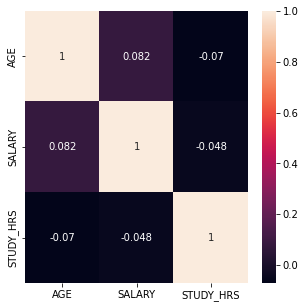

In [ ]:
# plot correlation matrix using seaborn heatmap
plt.figure(figsize=(5,5))
sns.heatmap(stud_df.corr(),cbar=True,annot=True)

## 2.2 Categorical Data Analysis

---

### A. Student Personal Information

**Gender**

In [ ]:
# Show frequency or count of students based on Gender
stud_df['GENDER'].value_counts()

Male      87
Female    58
Name: GENDER, dtype: int64

**Visualization:**

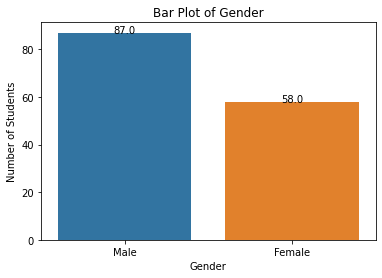

In [ ]:
# visualize the frequency using bar plot
fig = sns.countplot(x=stud_df['GENDER'])
fig.set(xlabel='Gender',
        ylabel='Number of Students',
        title="Bar Plot of Gender")
# to display count values on the top of bar
for p in fig.patches:
   fig.annotate('{:.1f}'.format(p.get_height()), 
                (p.get_x()+p.get_width()/2, 
                 p.get_height()), ha ='center') #adjust position to center
plt.show()

* Among 145 students, there are 87 males, which is more than female students (58), as shown in the bar plot above.


**Graduated High School Type**

In [ ]:
# Show count of students based on graduated high school type
stud_df['HS_TYPE'].value_counts()

State      103
Private     25
Other       17
Name: HS_TYPE, dtype: int64

**Visualization:**

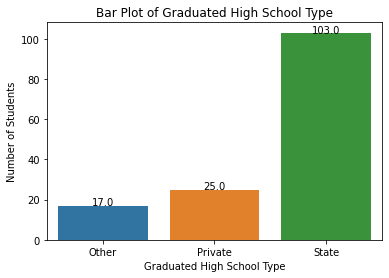

In [ ]:
fig = sns.countplot(data=stud_df.sort_values('HS_TYPE'), 
                    x ='HS_TYPE')
fig.set(xlabel = 'Graduated High School Type', 
        ylabel = 'Number of Students',
        title="Bar Plot of Graduated High School Type")
for p in fig.patches:
   fig.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()), ha ='center')
plt.show()



*   Most students (103 out of 145) are graduated from state high school.
*   Only 25 students are graduated from private high school.
*   The rest of 17 students are graduated from other type of high school



**Scholarship Type**

In [ ]:
# round the percentage of students based on scholaship type in 2 decimal places
round(stud_df['SCHOLARSHIP'].value_counts()/145*100,2)

50%     52.41
75%     28.97
100%    15.86
25%      2.07
0%       0.69
Name: SCHOLARSHIP, dtype: float64

**Visualization:**

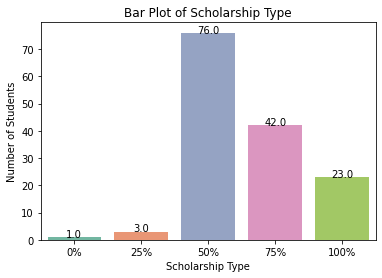

In [ ]:
# get scholarship column string for sorting purpose
stud_df['length'] = stud_df['SCHOLARSHIP'].str.len()
df = stud_df.sort_values(['length','SCHOLARSHIP'])

fig = sns.countplot(data = df, x ='SCHOLARSHIP',palette='Set2')
fig.set(xlabel = 'Scholarship Type',
        ylabel = 'Number of Students', 
        title="Bar Plot of Scholarship Type")
for p in fig.patches:
   fig.annotate('{:.1f}'.format(p.get_height()), 
                (p.get_x()+p.get_width()/2, 
                 p.get_height()), 
                ha ='center')
plt.show()


*   A majority of students (52.41% or 76 out of 145) took 50% scholarship.
*   Only 1 student did not apply for scholarship.



**Additional Work**

In [ ]:
stud_df['WORK'].value_counts()

No     96
Yes    49
Name: WORK, dtype: int64

* 99 students did not work whereas 49 students yes.

**Regular Artistic or Sports Activity**

In [ ]:
stud_df['ACTIVITY'].value_counts()

No     87
Yes    58
Name: ACTIVITY, dtype: int64

**Visualization:**

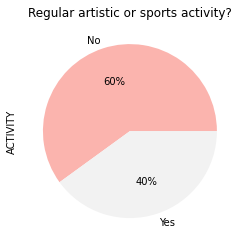

In [ ]:
stud_df['ACTIVITY'].value_counts(normalize = True).plot(kind='pie', 
                                                        autopct='%1.0f%%',
                                                        title='Regular artistic or sports activity?',
                                                        colormap = 'Pastel1')

* 60% students  did not participate in regular artistic or sports activity whereas 44% students yes.

**Partner**

In [ ]:
stud_df['PARTNER'].value_counts()

No     84
Yes    61
Name: PARTNER, dtype: int64

**Visualization:**

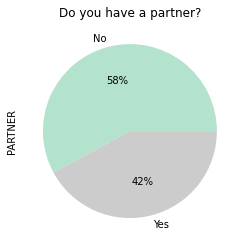

In [ ]:
stud_df['PARTNER'].value_counts(normalize = True).plot(kind='pie', 
                                                       autopct='%1.0f%%',
                                                       title='Do you have a partner?',
                                                       colormap = 'Pastel2')


* 84 (58%) students has partner whereas 61 (42%) students no.

**Transportation to the University**

In [ ]:
stud_df['TRANSPORT'].value_counts()

Private Car/Taxi    98
Other               21
Bicycle              1
Name: TRANSPORT, dtype: int64

**Visualization:**

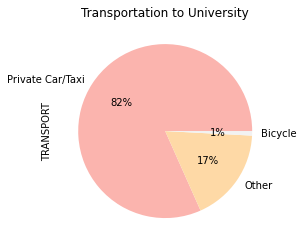

In [ ]:
stud_df['TRANSPORT'].value_counts(normalize = True).plot(kind='pie', 
                                                       autopct='%1.0f%%',
                                                       title='Transportation to University',
                                                       colormap = 'Pastel1')

* A majority of students (about 68% or 98 out of 145) students went to university by bus.
* Only 1 student ride a bike to university. (outlier)

**Accommodation type in Cyprus**

In [ ]:
stud_df['ACCOMM_TYPE'].value_counts()

Rental         68
Dormitory      49
With family    27
Other           1
Name: ACCOMM_TYPE, dtype: int64

**Visualization:**

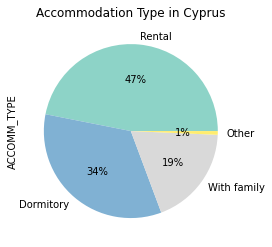

In [ ]:
stud_df['ACCOMM_TYPE'].value_counts(normalize = True).plot(kind='pie', 
                                                       autopct='%1.0f%%',
                                                       title='Accommodation Type in Cyprus',
                                                       colormap = 'Set3')

* Most of the students (47% or 68) choose to rent private accommodation.
* 49 students are living at dormitory while 27 students are staying with their family.
* Only 1 student is living in Other. (outlier)


### B. Students Family Information
**Parents' Education Level**

**Visualization:**

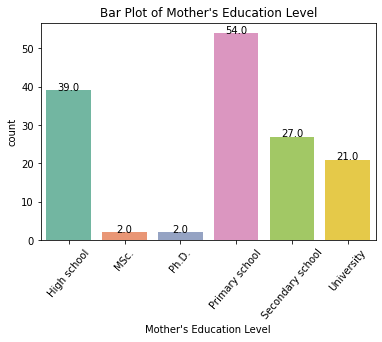

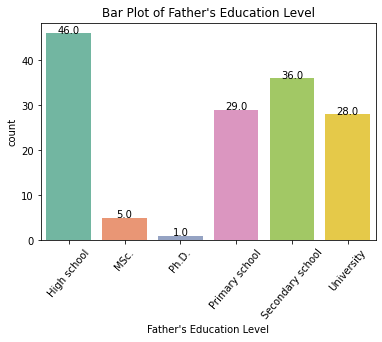

In [ ]:
parental_edu = stud_df[['MOTHER_EDU','FATHER_EDU']]
for col in parental_edu.columns:
  fig = sns.countplot(data = stud_df.sort_values(col), x =col ,palette='Set2')
  fig.set_xticklabels(fig.get_xticklabels(),rotation = 50)
  if col == 'MOTHER_EDU':
    fig.set(xlabel='Mother\'s Education Level', 
        title='Bar Plot of Mother\'s Education Level')
  else:
    fig.set(xlabel='Father\'s Education Level', 
        title='Bar Plot of Father\'s Education Level')
  for p in fig.patches:
    fig.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()), ha ='center')
  plt.show()
  print('\n\n')

* Majority of students' mothers' education level is at primary level (54), which is more than fathers'.
* Only fewer students' mothers achieved higher education at the MSc and PhD levels.
* The education level of most students' fathers (46) is at the high school level, which is more than mothers'.
* Although the number of students' fathers who achieved higher education at the PhD level is less than mothers', the education level of students' fathers is generally higher than mothers.

**Number of Siblings**

In [ ]:
stud_df['#_SIBLINGS'].value_counts().sort_index()

1             27
2             45
3             26
4             23
5 or above    24
Name: #_SIBLINGS, dtype: int64

**Parental Status**

In [ ]:
stud_df['PARENTAL_STATUS'].value_counts().sort_index()

Died - one of them or both      7
Divorced                       11
Married                       127
Name: PARENTAL_STATUS, dtype: int64

**Parents' Occupation**


In [ ]:
stud_df['MOTHER_JOB'].value_counts()

Housewife                  103
Private sector employee     18
Government officer          16
Retired                      6
Self-employment              2
Name: MOTHER_JOB, dtype: int64

In [ ]:
stud_df['FATHER_JOB'].value_counts()

Self-employment            38
Retired                    36
Private sector employee    35
Government officer         22
Other                      14
Name: FATHER_JOB, dtype: int64

**Visualization:**

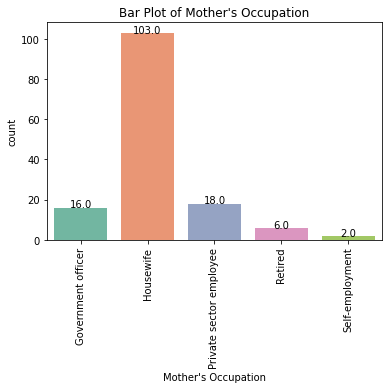

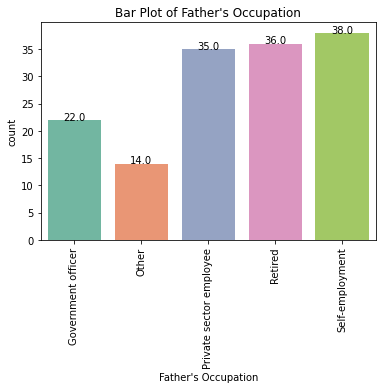

In [ ]:
# Plot bar plot of mother's job and father job;s
parental_job = stud_df[['MOTHER_JOB','FATHER_JOB']]
for col in parental_job.columns:
  fig = sns.countplot(data = stud_df.sort_values(col), x =col ,palette='Set2')
  fig.set_xticklabels(fig.get_xticklabels(),rotation = 90)

  if col == 'MOTHER_JOB':
    fig.set(xlabel='Mother\'s Occupation',title='Bar Plot of Mother\'s Occupation')
  else:
    fig.set(xlabel='Father\'s Occupation',title='Bar Plot of Father\'s Occupation')
  for p in fig.patches:
    fig.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()), ha ='center')
  plt.show()
  print('\n\n')
  plt.show()

* Majority of students' mother is housewife (103).
* Most students' father (38) are self-employed, while only 2 students' mothers are self-employed.
* There are also many students whose father was retired (36). 

### C. Cumulative Grade Point Average (CGPA)
**CGPA in the Last Semester and Expected CGPA in the Graduation**

**Visualization:**

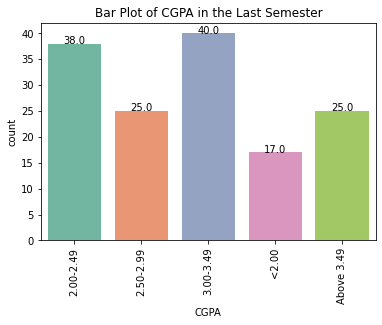

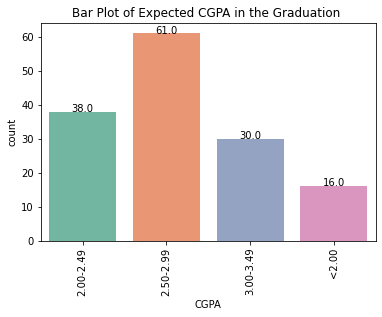

In [ ]:
CGPA = stud_df[['CUML_GPA','EXP_GPA']]
for col in CGPA.columns:
  fig = sns.countplot(data = stud_df.sort_values(col), x =col ,palette='Set2')
  fig.set_xticklabels(fig.get_xticklabels(),rotation = 90)

  if col == 'CUML_GPA':
    fig.set(xlabel='CGPA',
            title='Bar Plot of CGPA in the Last Semester')
  else:
    fig.set(xlabel='CGPA',
            title='Bar Plot of Expected CGPA in the Graduation ')
  for p in fig.patches:
    fig.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()), ha ='center')
  plt.show()
  print('\n')


## 2.3 Multivariate Analysis
---
### A. Categorical vs Categorical

**Question 1: Which gender achieved higher CGPA in the last semester?**


In [ ]:
round(pd.crosstab(stud_df['CUML_GPA'],
                  stud_df["GENDER"],
                  margins=True,
                  normalize=True)*100,2)

GENDER,Female,Male,All
CUML_GPA,,,
2.00-2.49,12.41,13.79,26.21
2.50-2.99,6.90,10.34,17.24
3.00-3.49,8.97,18.62,27.59
<2.00,7.59,4.14,11.72
Above 3.49,4.14,13.10,17.24
All,40.00,60.00,100.00


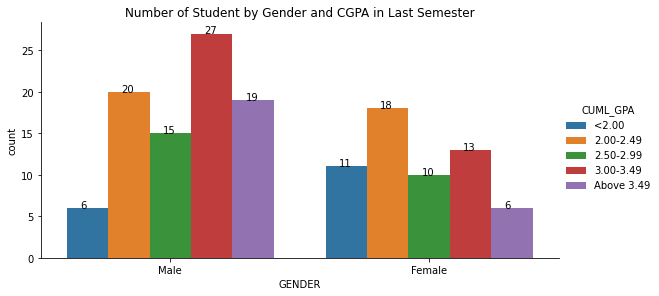

In [ ]:
fig = sns.catplot(data=stud_df, 
                  x="GENDER", 
                  hue="CUML_GPA", kind="count", height=4, aspect=2)
fig.set(title='Number of Student by Gender and CGPA in Last Semester')
ax = fig.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x()+0.05, 
            p.get_height(), 
            p.get_height())

In the last semester, among 145 students,

* 17 students (11.72%) achieved CGPA < 2.00, where 6 were male and 11 were female.
* 38 students (26.21%)  achieved CGPA between 2.00-2.49, where 20 were male and 18 were female.
* 25 students (17.24%) achieved CGPA between 2.50-2.99, where 15 were male and 10 were male.
* 40 students (27.59%) achieved CGPA between 3.00-3.40, where 27 were male and 13 were female.
* 25 students (17.24%) achieved CGPA above 3.49, where 19 were male and 6 were female.

The class of CGPA with the highest number of male and female students are 3.00-3.49 and 2.00-2.49, respectively, whereas the lowest is above 3.49 and < 2.00, respectively. Overall, male students achieved significantly higher CGPA than female.


**Question 2: Is parental education level influenced the expected CGPA in the graduation?**

In [ ]:
pd.crosstab(stud_df["MOTHER_EDU"],
            stud_df["EXP_GPA"], 
            margins=True)

EXP_GPA,2.00-2.49,2.50-2.99,3.00-3.49,<2.00,All
MOTHER_EDU,,,,,
High school,13,12,10,4,39
MSc.,1,1,0,0,2
Ph.D.,0,0,0,2,2
Primary school,13,24,10,7,54
Secondary school,7,15,5,0,27
University,4,9,5,3,21
All,38,61,30,16,145


In [ ]:
pd.crosstab(stud_df["FATHER_EDU"],
            stud_df["EXP_GPA"], 
            margins=True)

EXP_GPA,2.00-2.49,2.50-2.99,3.00-3.49,<2.00,All
FATHER_EDU,,,,,
High school,13,18,12,3,46
MSc.,2,1,0,2,5
Ph.D.,1,0,0,0,1
Primary school,4,14,7,4,29
Secondary school,9,15,9,3,36
University,9,13,2,4,28
All,38,61,30,16,145


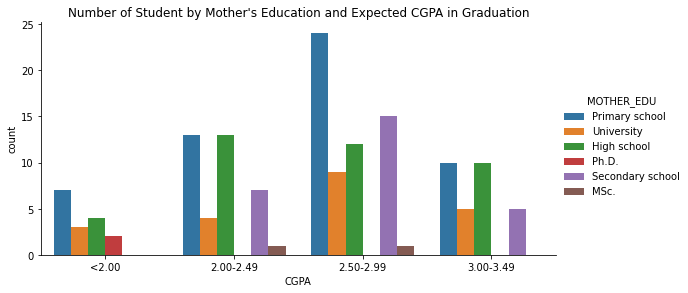

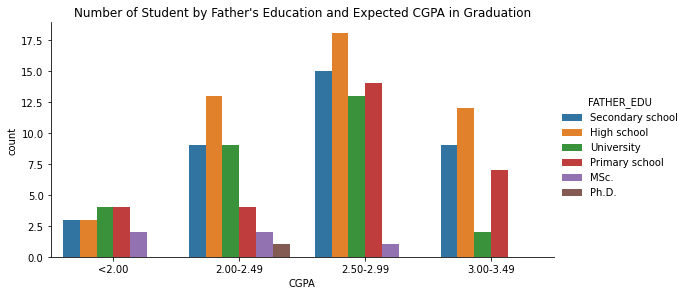

In [ ]:
stud_df['length'] = stud_df['EXP_GPA'].str.len()
df = stud_df.sort_values(['length','EXP_GPA'])
fig = sns.catplot(data=df, 
                  x='EXP_GPA', 
                  hue='MOTHER_EDU', 
                  kind='count',
                  height=4, 
                  aspect=2,
                  )
fig.set(xlabel = 'CGPA',
        title='Number of Student by Mother\'s Education and Expected CGPA in Graduation')
plt.show()


fig = sns.catplot(data=df, 
                  x='EXP_GPA', 
                  hue='FATHER_EDU', 
                  kind='count',
                  height=4, 
                  aspect=2,
                  )
fig.set(xlabel = 'CGPA',
        title='Number of Student by Father\'s Education and Expected CGPA in Graduation')

From the bar plot, we notice that
* there are students whose mother or father with higher education at MSc and Phd are expected to get low CGPA in the graduation.
* On the other hand, there are also students whose parents with primary education level are expected to get high CGPA in the graduation. So, the education level of parents may not influence students' expected CGPA.

In the previous section, we know that there exists outliers in parents education level (MSc and Phd). The result may be be biased by outliers.

**More on Categorical vs Categorical:**


* Mother education vs Father education (Correlated?)

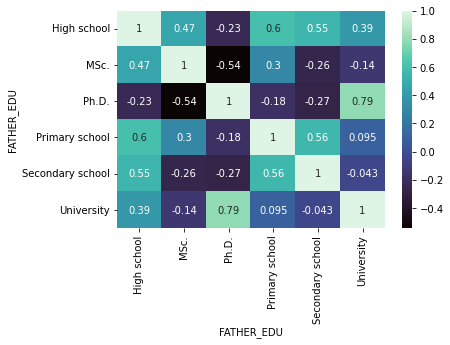

In [ ]:
data = pd.crosstab(stud_df['MOTHER_EDU'], stud_df['FATHER_EDU']).corr()
sns.heatmap(data, annot=True, cmap='mako')

* Scholarship vs CGPA in the Last Semester

In [ ]:
stud_df['length'] = stud_df['SCHOLARSHIP'].str.len()
df = stud_df.sort_values(['length','SCHOLARSHIP'])
pd.crosstab(df["CUML_GPA"], 
            df["SCHOLARSHIP"],
            margins=True, normalize=True)

SCHOLARSHIP,0%,100%,25%,50%,75%,All
CUML_GPA,,,,,,
2.00-2.49,0.006897,0.020690,0.006897,0.172414,0.055172,0.262069
2.50-2.99,0.000000,0.020690,0.006897,0.075862,0.068966,0.172414
3.00-3.49,0.000000,0.062069,0.000000,0.110345,0.103448,0.275862
<2.00,0.000000,0.013793,0.006897,0.075862,0.020690,0.117241
Above 3.49,0.000000,0.041379,0.000000,0.089655,0.041379,0.172414
All,0.006897,0.158621,0.020690,0.524138,0.289655,1.000000


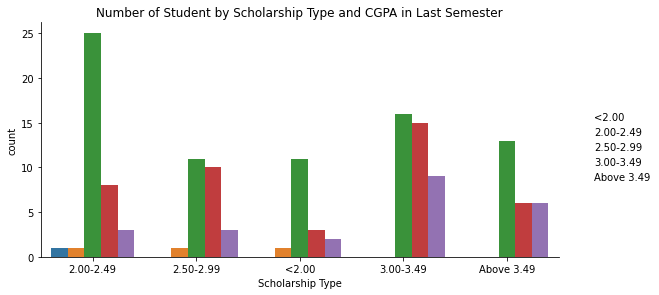

In [ ]:
fig = sns.catplot(data=df, 
                  x="CUML_GPA", 
                  hue="SCHOLARSHIP", 
                  kind='count',
                  height=4, 
                  aspect=2,
                  legend = False)
fig.set(xlabel = 'Scholarship Type',
        title='Number of Student by Scholarship Type and CGPA in Last Semester')
fig.add_legend(label_order = ['<2.00','2.00-2.49','2.50-2.99','3.00-3.49','Above 3.49'])

In [ ]:
round(pd.crosstab(stud_df['CUML_GPA'], 
            stud_df['HS_TYPE'], 
            normalize=True)*100,2)

HS_TYPE,Other,Private,State
CUML_GPA,,,
2.00-2.49,2.07,6.21,17.93
2.50-2.99,0.69,2.07,14.48
3.00-3.49,5.52,4.83,17.24
<2.00,2.76,2.07,6.90
Above 3.49,0.69,2.07,14.48


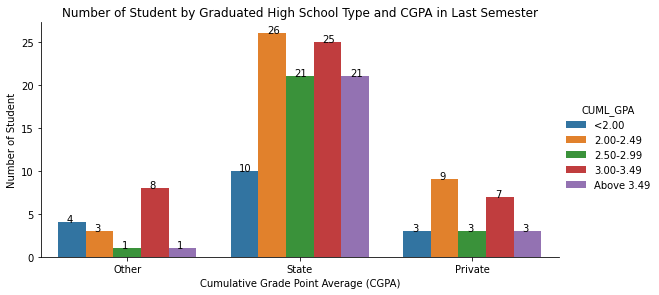

In [ ]:
fig = sns.catplot(data=stud_df, 
                  x='HS_TYPE', 
                  hue='CUML_GPA', 
                  kind='count',
                  height=4, 
                  aspect=2,)
fig.set(xlabel = 'Cumulative Grade Point Average (CGPA)',
        ylabel = 'Number of Student', 
        title='Number of Student by Graduated High School Type and CGPA in Last Semester')

ax = fig.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x()+ 0.05, 
            p.get_height(), 
            p.get_height())

### B. Categorical vs Continuous Analysis

**Question 3: Is spending more hours on study achieved high CGPA?**


In [ ]:
pd.pivot_table(stud_df.sort_values('CUML_GPA'), values = 'STUDY_HRS', index='CUML_GPA')

,STUDY_HRS
CUML_GPA,
2.00-2.49,5.263158
2.50-2.99,6.520000
3.00-3.49,4.925000
<2.00,4.411765
Above 3.49,5.120000


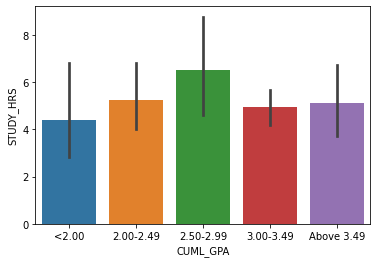

In [ ]:
fig = sns.barplot(
    x="CUML_GPA",
    y="STUDY_HRS",
    data=stud_df)

The bar plot above clearly shows that spending more hours on study will not guarantee high CGPA but the average 2.50-2.99 range.

# References:

https://analyticsindiamag.com/5-ways-handle-missing-values-machine-learning-datasets/

https://www.academia.edu/51350289/Students_Performance_Analysis_with_EDA_and_Machine_Learning_Models

https://www.kaggle.com/code/harunshimanto/student-s-academic-performance-with-ml-eda/notebook

https://www.kaggle.com/code/janietran/eda-on-higher-education-students-performance/data

